In [1]:
import pandas as pd
import matplotlib.pyplot as plt

red_wines = pd.read_csv('./winequality-red.csv', sep=';')
white_wines = pd.read_csv('./winequality-white.csv', sep=';')

red_wines.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

# V.1: Exploring the green reds

__a) Write a function that will plot a scatterplot matrix of your red wine data__

In [2]:
def plot_scatter_matrix(wine_data, good_threshold, bad_threshold, save_plot=False):
    fig, axes = plt.subplots(12, 12, figsize=(100,100))
    fig.subplots_adjust(hspace=0, wspace=0)
    
    
    
    for ax in axes.flat:
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
    
    for y in range(0, 12):
        for x in range(0, 12):
            if x == y:
                axes[y, x].text(0.5, 0.5, wine_data.columns[y], fontsize=40, ha='center', va='center')
            else:
                colors = ['b' if k >= good_threshold else 'r' for k in wine_data['quality']]
                size = [30 if k > good_threshold else 30 if k < bad_threshold else 0 for k in wine_data['quality']]
                axes[y, x].scatter(wine_data.iloc[:, x], wine_data.iloc[:, y], s=size, c=colors)
            
    if save_plot == True:
        plt.savefig('scatter_matrix.png')

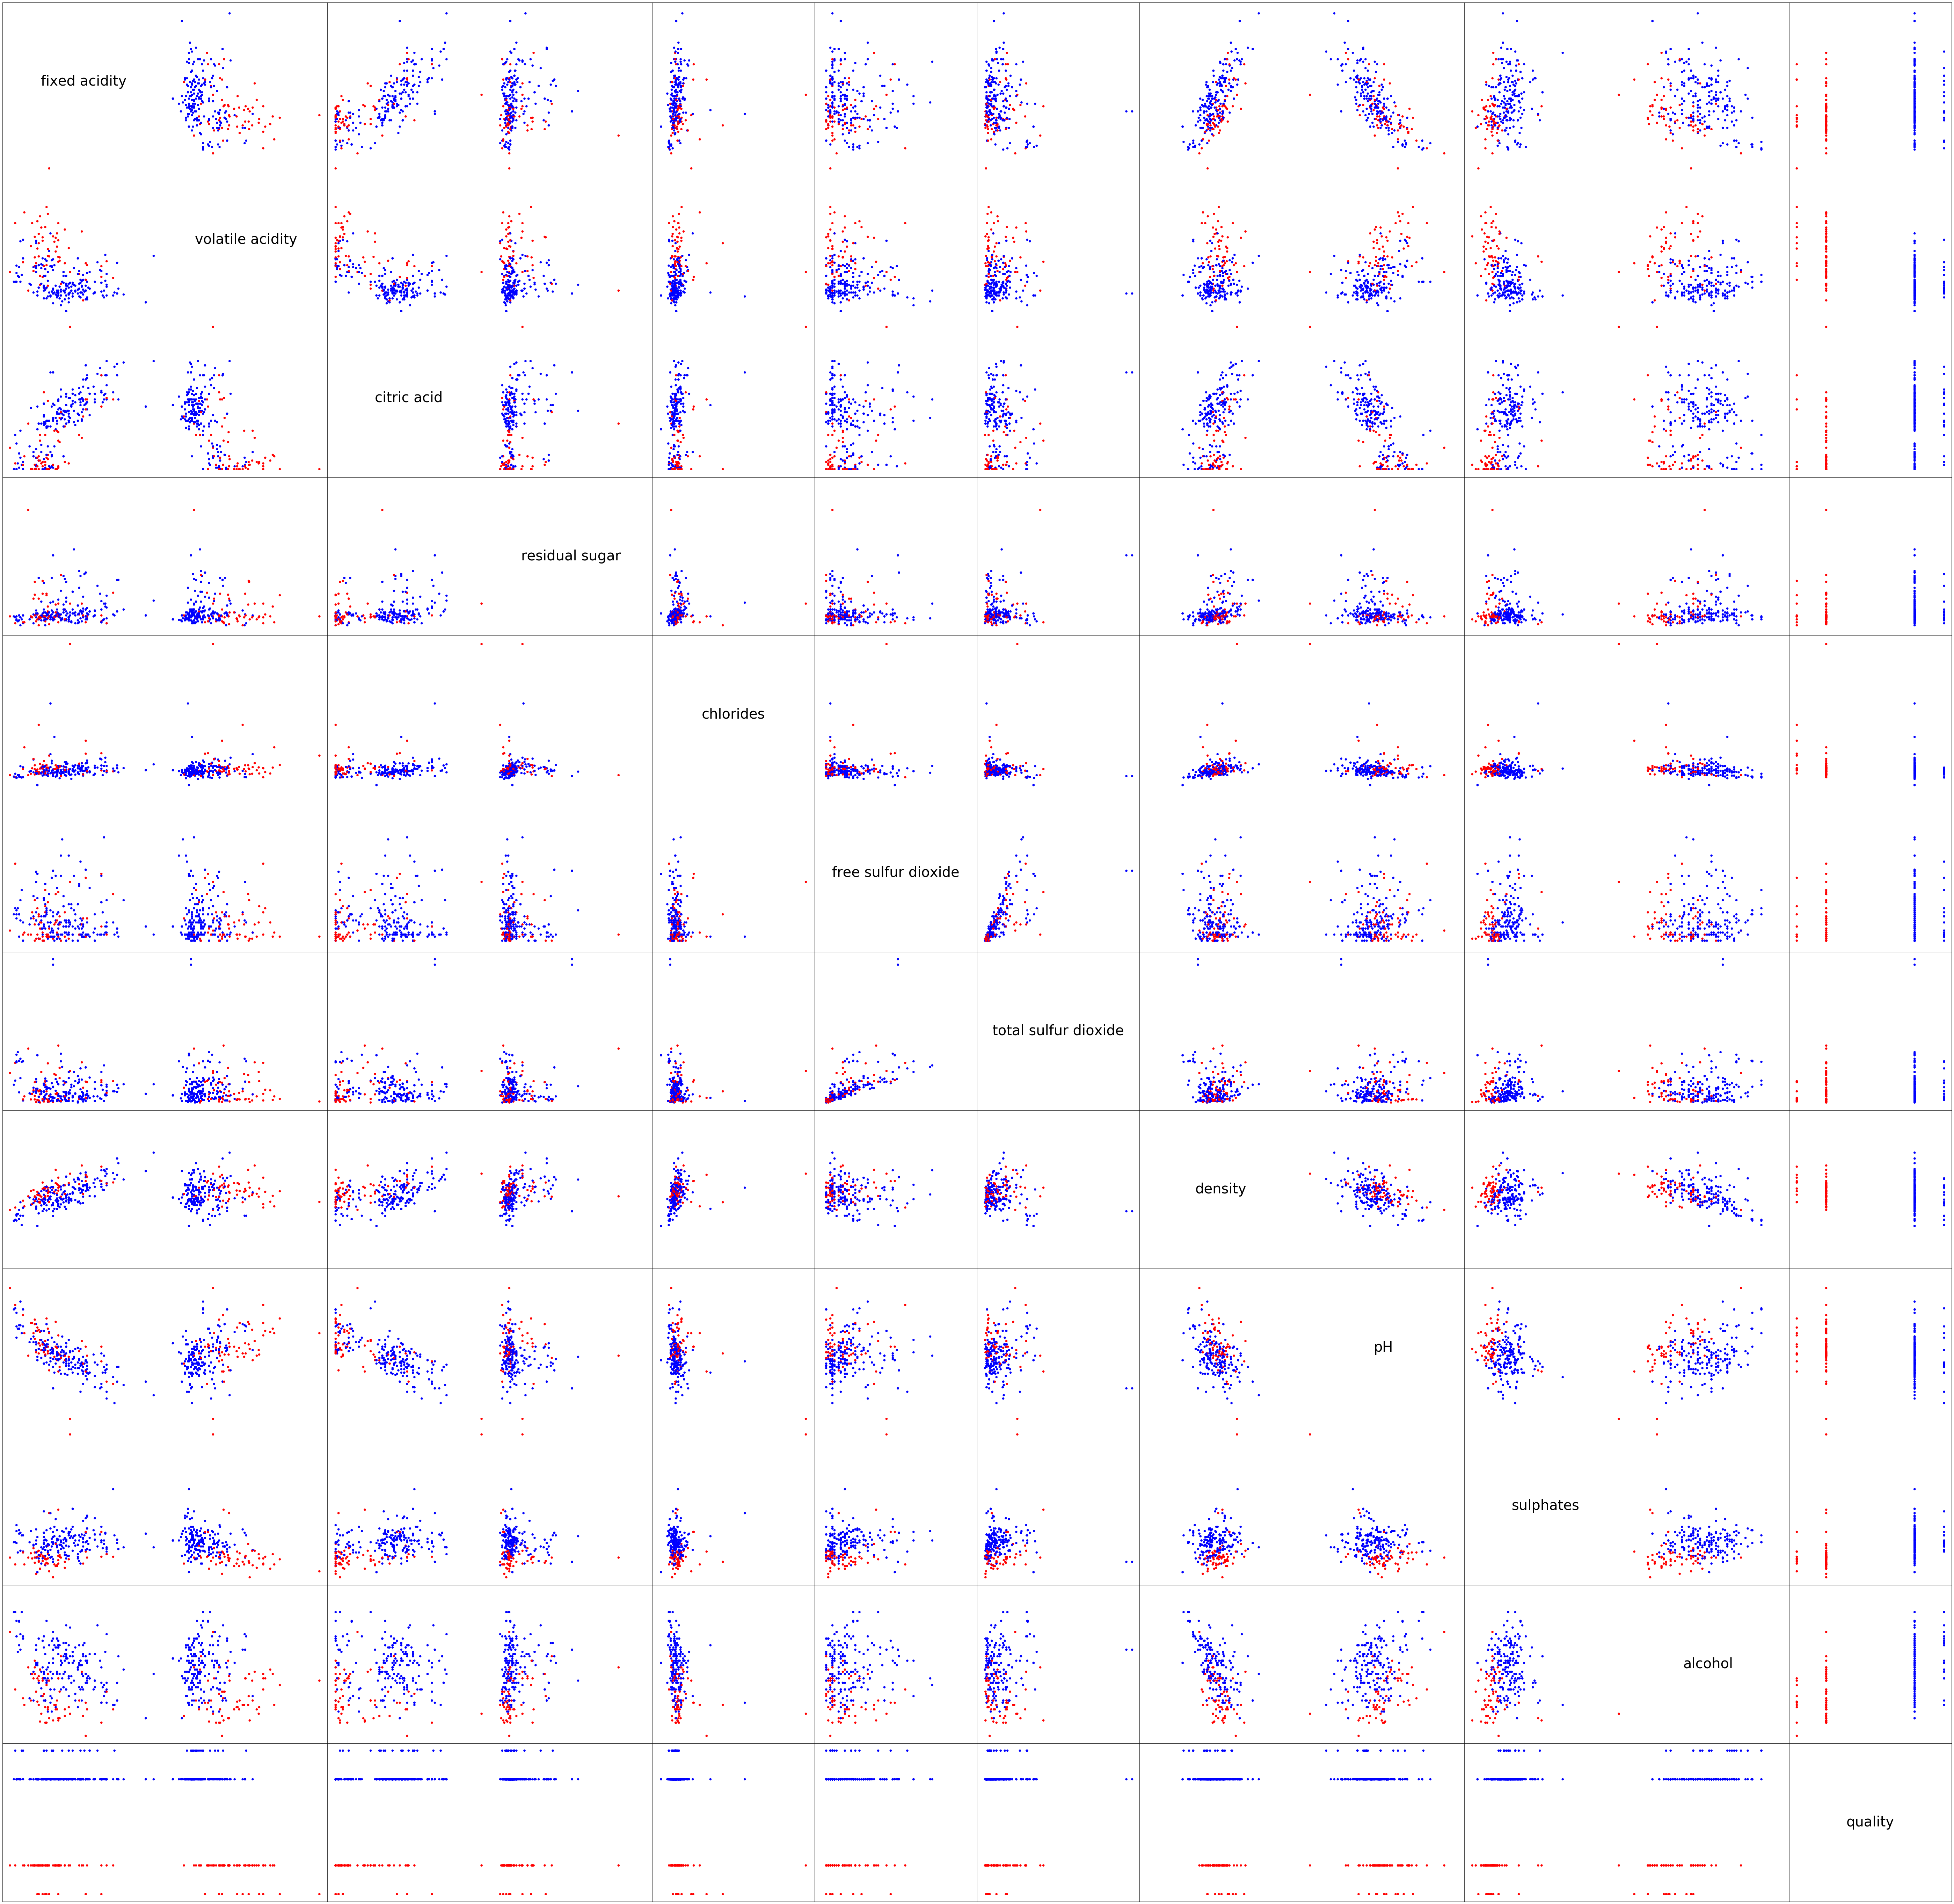

In [3]:
plot_scatter_matrix(red_wines, 6, 5)

__b) Which factors do you think will be most useful to your perceptron for distinguishing high quality vs. low quality wines? Why?__

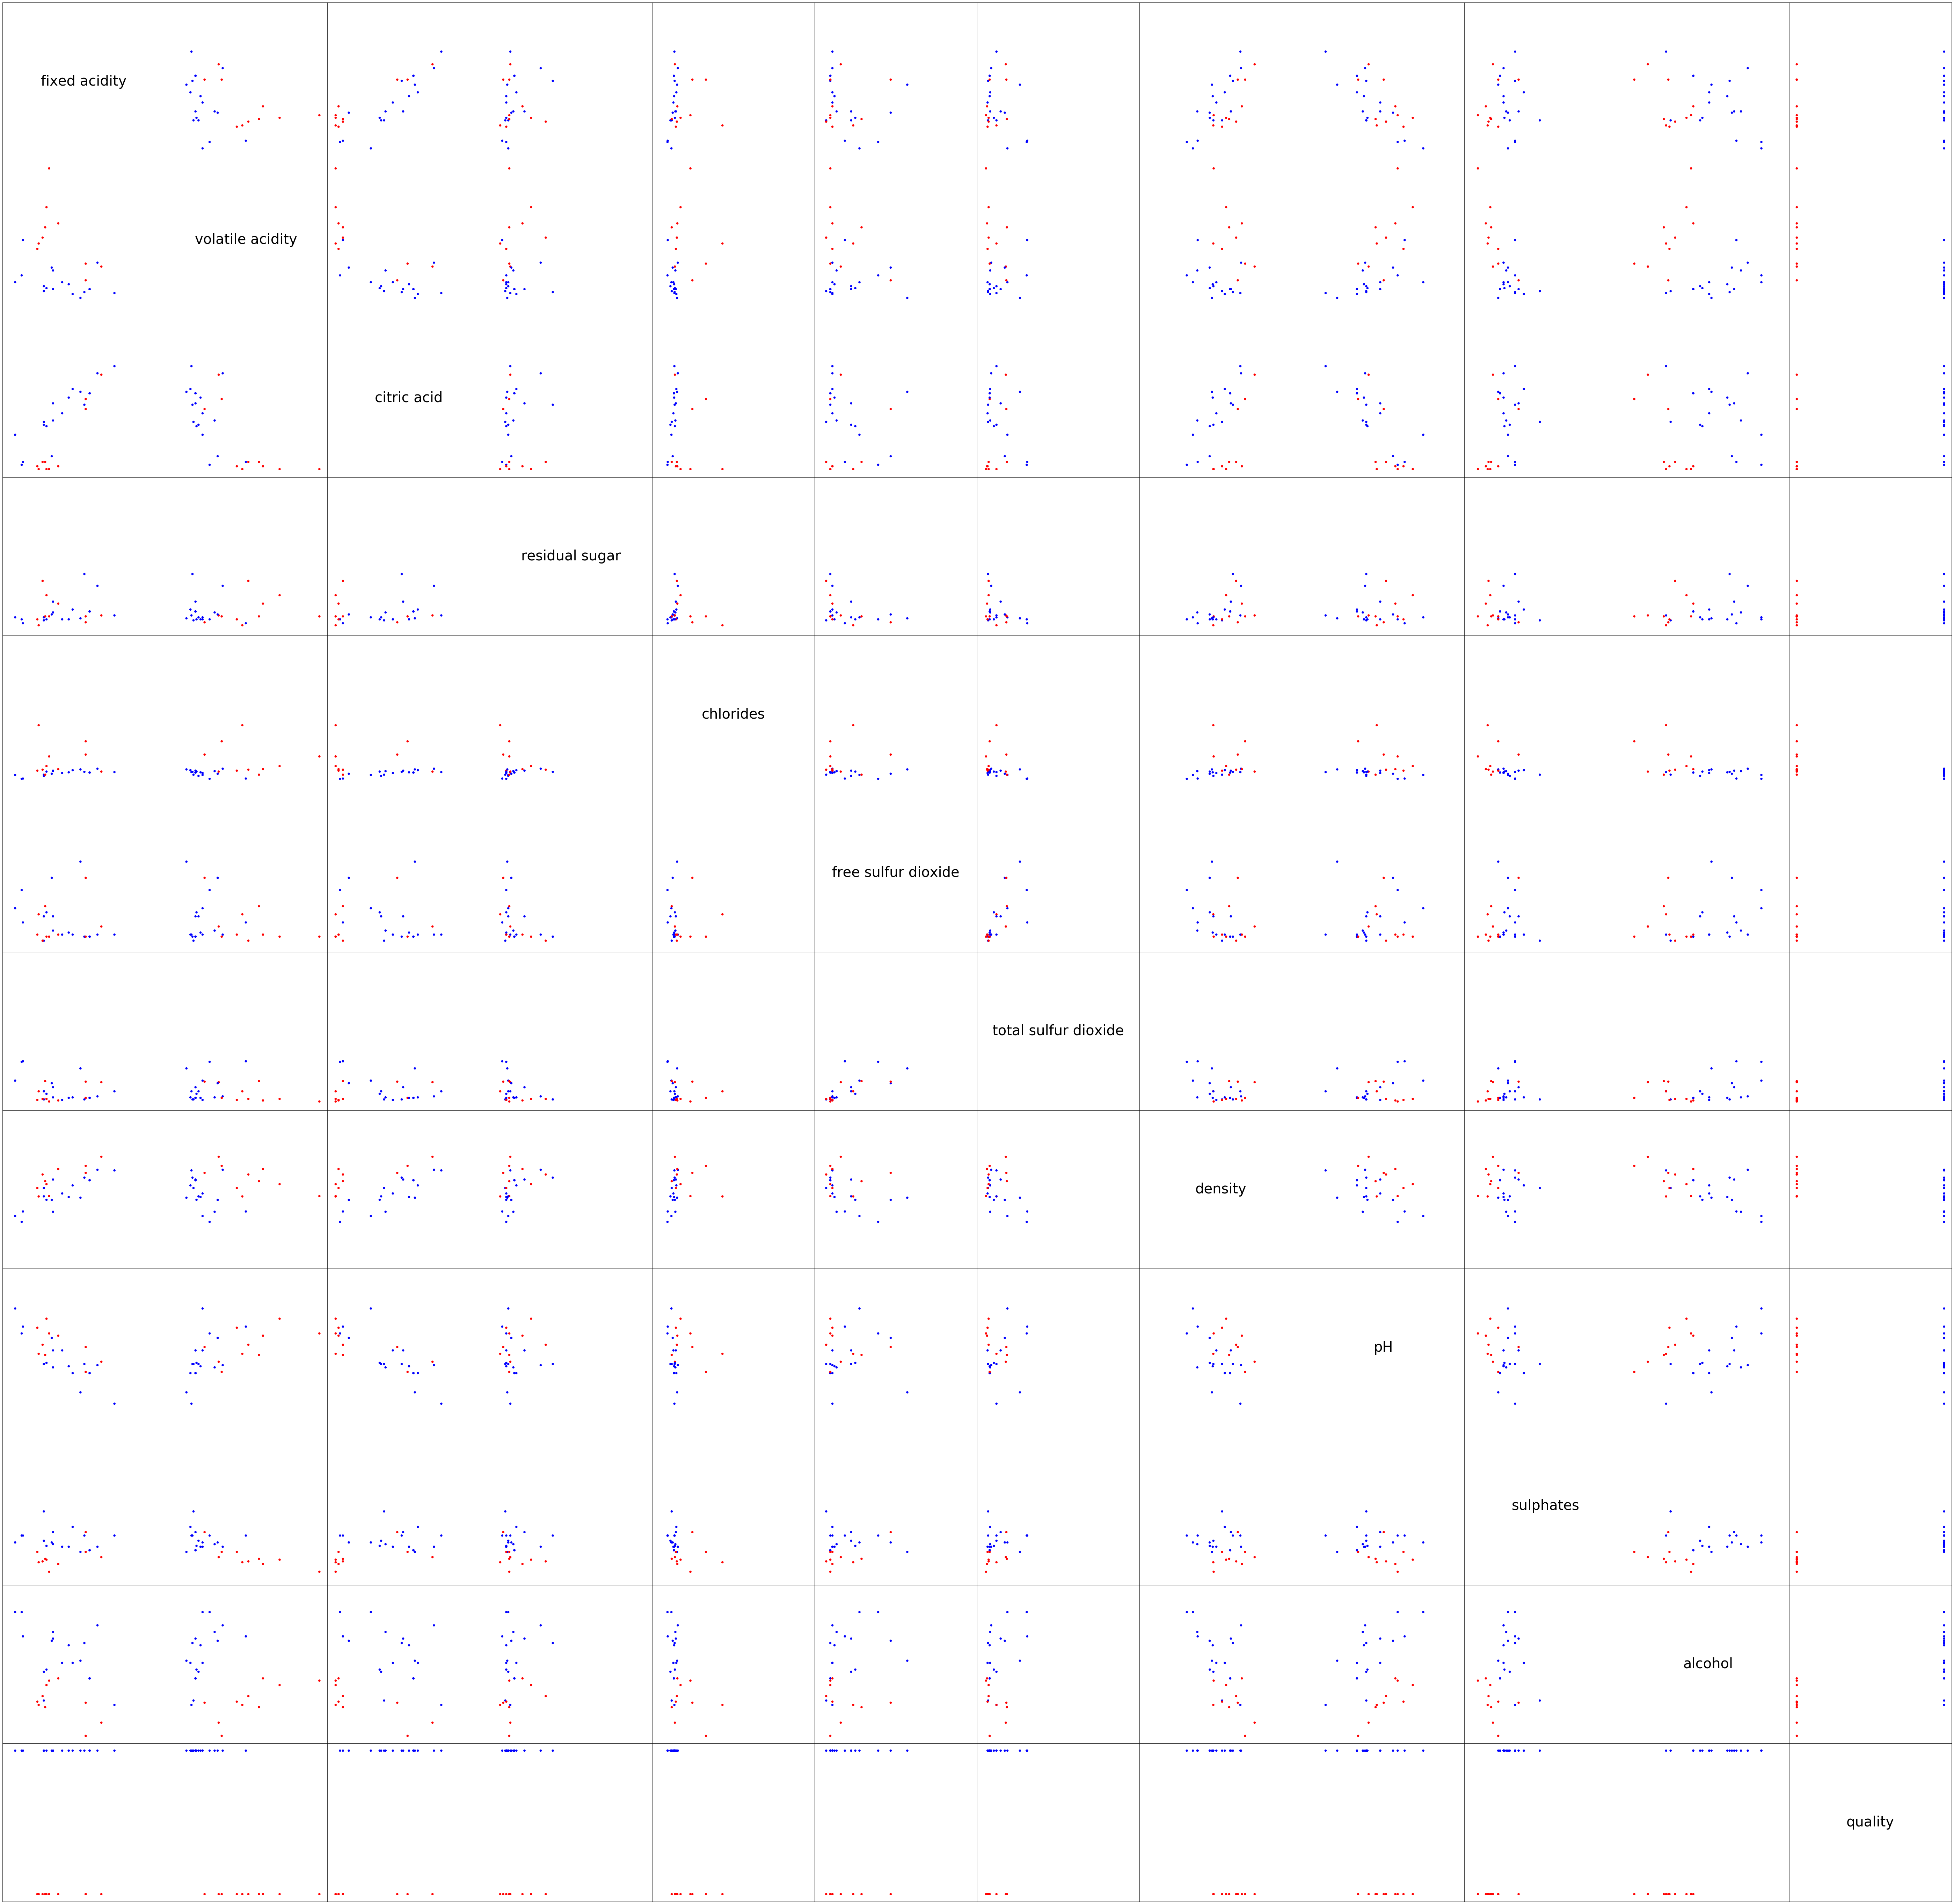

In [4]:
plot_scatter_matrix(red_wines, 7, 4)

Alcohol and pH will be good factors to begin with as we can clearly see a linear separation between both.

# V.2: Learning to perceptron

__a) & b) Perceptron implementation__

In [5]:
import random

red_wines['is good'] = red_wines['quality'] > 5

selected_red_wines = red_wines[(red_wines['quality'] > 7) | (red_wines['quality'] < 4)]
selected_red_wines = selected_red_wines.reset_index(drop=True)

input_features = selected_red_wines.loc[:, ['pH', 'alcohol']].values
output_targets = selected_red_wines['is good'].values


selected_red_wines.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.9              0.35         0.46             3.6      0.078   
1           10.3              0.32         0.45             6.4      0.073   
2            5.6              0.85         0.05             1.4      0.045   
3           12.6              0.31         0.72             2.2      0.072   
4           11.3              0.62         0.67             5.2      0.086   
5           11.6              0.58         0.66             2.2      0.074   
6            9.4              0.30         0.56             2.8      0.080   
7           10.7              0.35         0.53             2.6      0.070   
8           10.7              0.35         0.53             2.6      0.070   
9           10.4              0.61         0.49             2.1      0.200   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 15.0                  37.0   0.9973  3.35       0.86   
1                  5.0                  13.0   0.9976  3.23       0.82   
2                 12.0                  88.0   0.9924  3.56       0.82   
3                  6.0                  29.0   0.9987  2.88       0.82   
4                  6.0                  19.0   0.9988  3.22       0.69   
5                 10.0                  47.0   1.0008  3.25       0.57   
6                  6.0                  17.0   0.9964  3.15       0.92   
7                  5.0                  16.0   0.9972  3.15       0.65   
8                  5.0                  16.0   0.9972  3.15       0.65   
9                  5.0                  16.0   0.9994  3.16       0.63   

   alcohol  quality  is good  
0     12.8        8     True  
1     12.6        8     True  
2     12.9        8     True  
3      9.8        8     True  
4     13.4        8     True  
5      9.0        3    False  
6     11.7        8     True  
7     11.0        8     True  
8     11.0        8     True  
9      8.4        3    False

In [6]:
def init_random_vector(size, seed=None):
    
    if seed:
        random.seed(seed)
        
    vector = [0.0001 * random.uniform(-1, 1) for i in range(size)]
    
    return vector

In [7]:
def dot_product(a, b):
    
    if len(a) != len(b):
        raise ValueError('arguments have different length')
        
    result = 0
    
    for i in range(len(a)):
        result += a[i] * b[i]
        
    return result

In [8]:
class Perceptron:
    
    def __init__(self, features, targets):
        self.features = features
        self.targets = targets
    
    def train(self, learning_rate=0.1, number_of_epochs=0):
        
        self.weights = init_random_vector(self.features.shape[1] + 1, 1000) # We add one to use w[0] as bias
        self.performance = []
        
        current_epoch = 0
        while True:
            if number_of_epochs != 0 and current_epoch >= number_of_epochs:
                break
            number_of_errors = 0
            for feature, target in zip(self.features, self.targets):
                delta_weight = learning_rate * (target - self.predict(feature))
                self.weights[1:] += delta_weight * feature
                self.weights[0] += delta_weight
                number_of_errors += int(delta_weight != 0)
            self.performance.append([current_epoch, number_of_errors, self.weights[1:], self.weights[0]])
            if number_of_errors == 0:
                break
            current_epoch += 1
        
        return self.performance
    
    def predict(self, features):
        return 1 if dot_product(self.weights[1:], features) + self.weights[0] >= 0 else 0

In [9]:
perceptron = Perceptron(input_features, output_targets)

training_performance = perceptron.train()
print(training_performance)

[[0, 13, [-0.3499660348880881, 0.37991982792078505], -0.09994452867145989], [1, 13, [-0.7199660348880883, 0.6499198279207848], -0.19994452867145993], [2, 11, [-1.0879660348880884, 0.7499198279207847], -0.29994452867145993], [3, 11, [-1.4659660348880885, 0.7399198279207846], -0.3999445286714599], [4, 13, [-1.8359660348880882, 1.0099198279207844], -0.4999445286714599], [5, 11, [-2.213966034888088, 0.9999198279207844], -0.5999445286714599], [6, 9, [-2.553966034888089, 0.869919827920784], -0.6999445286714598], [7, 2, [-2.561966034888089, 0.8999198279207841], -0.6999445286714598], [8, 6, [-2.6319660348880882, 1.079919827920784], -0.6999445286714598], [9, 13, [-3.0019660348880883, 1.3499198279207838], -0.7999445286714598], [10, 7, [-3.326966034888089, 1.139919827920784], -0.8999445286714598], [11, 4, [-3.380966034888089, 1.1999198279207839], -0.8999445286714598], [12, 6, [-3.450966034888088, 1.3799198279207838], -0.8999445286714598], [13, 9, [-3.790966034888089, 1.2499198279207835], -0.99994

__c) Plotting the performance during training__

In [14]:
def plot_performance(performance, wine_data, good_threshold, bad_threshold, epoch=-1, save_plot=False):
    
    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    
    axes[0].plot([x[0] for x in performance], [x[1] for x in performance])
    axes[0].set_xlabel('epoch')
    axes[0].set_ylabel('classification errors')
    axes[0].set_title('Errors as a function of epoch')
    
    selected_red_wines = wine_data[(wine_data['quality'] > 7) | (wine_data['quality'] < 4)]
    x = selected_red_wines.loc[:, ['alcohol']].values
    y = selected_red_wines.loc[:, ['pH']].values
    
        
    x_min = x.min() - 0.15
    x_max = x.max() + 0.15
    y_min = y.min() - 0.15
    y_max = y.max() + 0.15
    
    w2, w1 = performance[epoch][2]
    b = performance[epoch][3]
    slope = -w1/w2
    intercept = -b/w2
    x_coords = range(int(x_min) - 1, int(x_max) + 2)
    y_coords = slope * x_coords + intercept
    
    axes[1].plot(x_coords, y_coords,'b--', label='Decision boundary')
    axes[1].set_xlim([x_min, x_max])
    axes[1].set_ylim([y_min, y_max])
    axes[1].fill_between(x_coords, y_coords, y_min, color='b', alpha=0.2)
    axes[1].fill_between(x_coords, y_coords, y_max, color='r', alpha=0.2)
    
    good_wines = wine_data[(wine_data['quality'] > good_threshold)]
    bad_wines = wine_data[(wine_data['quality'] < bad_threshold)]
    
    axes[1].scatter(bad_wines['alcohol'], bad_wines['pH'], c=['r'], label='bad wines (< {} score)'.format(bad_threshold))
    axes[1].scatter(good_wines['alcohol'], good_wines['pH'], c=['b'], label='good wines (> {} score)'.format(good_threshold))
    axes[1].legend(bbox_to_anchor=(1.05, 1), loc=2)
    
    axes[1].set_title('Decision boundary on epoch: {}'.format(performance[epoch][0]))
    axes[1].set_xlabel('alcohol')
    axes[1].set_ylabel('pH')
        
    plt.show()
    
    if save_plot == True:
        plt.savefig('scatter_matrix.png')   
    

In [11]:
plot_performance(training_performance, red_wines, 7, 4)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
267             7.9              0.35         0.46             3.6      0.078   
278            10.3              0.32         0.45             6.4      0.073   
390             5.6              0.85         0.05             1.4      0.045   
440            12.6              0.31         0.72             2.2      0.072   
455            11.3              0.62         0.67             5.2      0.086   
481             9.4              0.30         0.56             2.8      0.080   
495            10.7              0.35         0.53             2.6      0.070   
498            10.7              0.35         0.53             2.6      0.070   
588             5.0              0.42         0.24             2.0      0.060   
828             7.8              0.57         0.09             2.3      0.065   
1061            9.1              0.40         0.50             1.8      0.071   
1090           10.0         

__d) Feature scaling to speed up training__

In [12]:
def scale_series(series):
    return (series - series.mean()) / (series.max() - series.min())        

    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             7.9              0.35         0.46             3.6      0.078   
1            10.3              0.32         0.45             6.4      0.073   
2             5.6              0.85         0.05             1.4      0.045   
3            12.6              0.31         0.72             2.2      0.072   
4            11.3              0.62         0.67             5.2      0.086   
6             9.4              0.30         0.56             2.8      0.080   
7            10.7              0.35         0.53             2.6      0.070   
8            10.7              0.35         0.53             2.6      0.070   
10            5.0              0.42         0.24             2.0      0.060   
12            7.8              0.57         0.09             2.3      0.065   
15            9.1              0.40         0.50             1.8      0.071   
16           10.0              0.26         0.54    

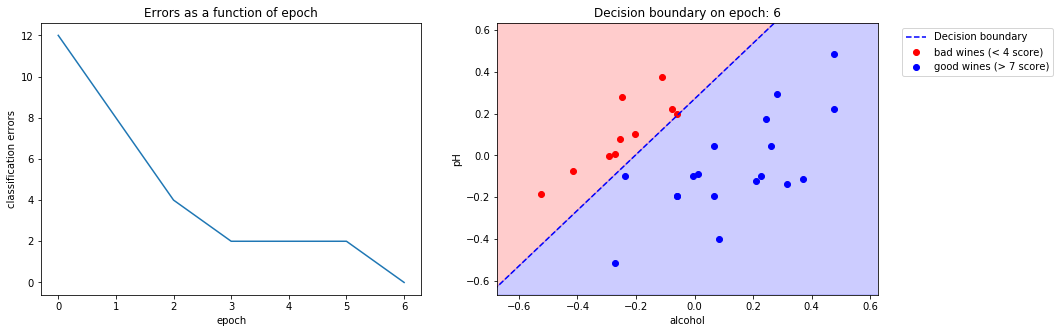

In [13]:
selected_red_wines = red_wines[(red_wines['quality'] > 7) | (red_wines['quality'] < 4)]
selected_red_wines = selected_red_wines.reset_index(drop=True)

selected_red_wines['pH'] = scale_series(selected_red_wines['pH'])
selected_red_wines['alcohol'] = scale_series(selected_red_wines['alcohol'])

input_features = selected_red_wines.loc[:, ['pH', 'alcohol']].values
output_targets = selected_red_wines['is good'].values

perceptron = Perceptron(input_features, output_targets)

training_performance = perceptron.train(learning_rate=0.0001)

plot_performance(training_performance, selected_red_wines, 7, 4)